# WeRateDogs Project

## Table of contents: 
- Gathering data
- Assessing data
- Cleanning data
- Storing data
- Analyzing and Visualizing Data

## Gathering data

### Importing all the libraries needed

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import time
import json
from timeit import default_timer as timer
import seaborn as sns
import re
import matplotlib.pyplot as plt 
%matplotlib inline

### Reading the twitter archive file

In [2]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Downloading the Image prediction file programaticaly

In [3]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open (url.split('/')[-1], mode='wb') as file:
    file.write(response.content)
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Gathering data using Twitter API

In [4]:
consumer_key = 'Hidden'
consumer_secret = 'Hidden'
access_token = 'Hidden'
access_secret = 'Hidden'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [5]:
list_of_tweets = []
missing_tweets = []
start_time = time.time()
print('scanning IDs')

with open ('tweet_json.txt', 'a') as file:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            list_of_tweets.append(api.get_status(tweet_id, tweet_mode = 'extended'))
        except Exception as e:
            missing_tweets.append(tweet_id)
            
end_time = time.time()
print('Scanning complete\n')
print('IDs with tweets: ', len(list_of_tweets))
print('IDs with no tweets: ', len(missing_tweets))
print('Time took for this process {} seconds'.format(end_time - start_time))

scanning IDs


Rate limit reached. Sleeping for: 581
Rate limit reached. Sleeping for: 589


Scanning complete

IDs with tweets:  2331
IDs with no tweets:  25
Time took for this process 2214.1511821746826 seconds


### Storing Twitter data to JSON file

In [6]:
new_list = []

with open('tweet_json.txt') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        tweet_id = json_data['id']
        favorite_count = json_data['favorite_count']
        retweet_count = json_data['retweet_count']
                
        new_list.append({'tweet_id': tweet_id,
                        'favorite_count': favorite_count,
                        'retweet_count': retweet_count})

# create a new DataFrame 
counts_list_df = pd.DataFrame(new_list, columns = ['tweet_id', 'favorite_count', 'retweet_count'])
counts_list_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35466,7490
1,892177421306343426,30699,5557
2,891815181378084864,23091,3680
3,891689557279858688,38763,7667
4,891327558926688256,37038,8271


# Assessing Data

## Twitter archive

In [7]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [8]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [10]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
853,765371061932261376,NaN,NaN,2016-08-16 02:14:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Louie. He's had a long day. Did a lot ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/765371061...,11,10,Louie,None,None,pupper,None
1226,713919462244790272,NaN,NaN,2016-03-27 02:43:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kanu. He's a Freckled Ticonderoga. Sim...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713919462...,12,10,Kanu,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
1720,680145970311643136,NaN,NaN,2015-12-24 22:00:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Kawhi. He was doing fine until hi...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680145970...,10,10,Kawhi,None,None,pupper,None
1905,674606911342424069,6.744689e+17,4.196984e+09,2015-12-09 15:09:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The 13/10 also takes into account this impecca...,NaN,NaN,NaN,NaN,13,10,None,None,None,None,None


In [11]:
sum(twitter_archive.duplicated())

0

In [12]:
twitter_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
            ... 
Laela          1
Hubertson      1
Bowie          1
Ginger         1
Noah           1
Name: name, Length: 957, dtype: int64

### Quality
- In name column some names are false 
- IDs are float and int although we wont do any calculations on them 
- Timestamp column are object 
- Source column can not be read easily 
- Delete columns that are unnecessary for calculations 
- Some dog stages has two entries might be a typing error (found while merging files in the cleaning process)

### Tidiness
- doggo	floofer	pupper	puppo columns all represent dog stage 

## Image predictions

In [13]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1059,714982300363173890,https://pbs.twimg.com/media/CewgnHAXEAAdbld.jpg,1,Brittany_spaniel,0.944376,True,beagle,0.025435,True,Ibizan_hound,0.009962,True
619,680440374763077632,https://pbs.twimg.com/ext_tw_video_thumb/68044...,1,space_heater,0.920367,False,radiator,0.049933,False,electric_fan,0.006719,False
899,699788877217865730,https://pbs.twimg.com/media/CbYmRHyWEAASNzm.jpg,1,Border_terrier,0.355060,True,toy_poodle,0.169736,True,Norwegian_elkhound,0.099884,True
1749,823699002998870016,https://pbs.twimg.com/media/C25d3nkXEAAFBUN.jpg,1,cairn,0.203999,True,snorkel,0.171893,False,Norfolk_terrier,0.107543,True
1410,770655142660169732,https://pbs.twimg.com/media/CrHqwjWXgAAgJSe.jpg,1,Madagascar_cat,0.494803,False,skunk,0.161184,False,paper_towel,0.091572,False


In [17]:
sum(image_predictions.duplicated())

0

### Quality
- p1,p2,p3 columns are not consistently lower or uppercase 
- p1,p2,p3 columns words are separated by an underscore 
- img_num column is unnecessary 

### Tidiness
- The p1,p2,p3_conf and p1,p2,p3 colums are unnecessary

## Twitter count list

In [18]:
counts_list_df

,tweet_id,favorite_count,retweet_count
0,892420643555336193,35466,7490
1,892177421306343426,30699,5557
2,891815181378084864,23091,3680
3,891689557279858688,38763,7667
4,891327558926688256,37038,8271
...,...,...,...
2326,666049248165822465,96,40
2327,666044226329800704,265,125
2328,666033412701032449,109,39
2329,666029285002620928,119,41


In [19]:
counts_list_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [20]:
counts_list_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7410.927070,2635.000858
std,6.823170e+16,11508.364554,4456.206304
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1288.000000,535.000000
50%,7.182469e+17,3221.000000,1230.000000
75%,7.986692e+17,9069.000000,3059.000000
max,8.924206e+17,152946.000000,75704.000000


In [21]:
sum(counts_list_df.duplicated())

0

### Tidiness
- All three tables could be merged into one table twitter_archive 

# Cleaning

#### Making copies before cleaning

In [22]:
twitter_archive_clean = twitter_archive.copy()

In [23]:
image_predictions_clean = image_predictions.copy()

In [24]:
counts_list_clean_df = counts_list_df.copy()

#### Merge all files into one

In [126]:
Tweet_df = pd.merge(twitter_archive_clean, image_predictions_clean, how = 'inner', on = ['tweet_id'])
Tweet_df = pd.merge(Tweet_df, counts_list_clean_df, how = 'inner', on = ['tweet_id'])
Tweet_df.to_csv('Tweet_df.csv')

In [127]:
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

##### The p1,p2,p3_conf and p1,p2,p3 colums are unnecessary
- Define: create dog breed prediction and predection confidence colums to merge all the unnecessary columns 

In [128]:
def breed(row):
    if row['p1_dog']:
        return(row['p1'])
    elif row['p2_dog']:
        return(row['p2'])
    elif row['p3_dog']:
        return(row['p3'])
    else:
        return(np.NaN)
Tweet_df['breed_prediction'] = Tweet_df.apply (lambda row: breed (row),axis=1)    

In [129]:
def confidence(row):
    if row['p1_dog']:
        return(row['p1_conf'])
    elif row['p2_dog']:
        return(row['p2_conf'])
    elif row['p3_dog']:
        return(row['p3_conf'])
    else:
        return(np.NaN)
Tweet_df['prediction_confidence'] = Tweet_df.apply (lambda row: confidence(row),axis=1)    

#####  doggo floofer pupper	puppo columns all represnt dog stage
- Define: create dog stage column to add all the (doggo floofer pupper puppo)

In [130]:
def dog_stage(row):
    stage = []
    if row['doggo'] == 'doggo':
        stage.append('doggo')
    if row['floofer'] == 'floofer':
        stage.append('floofer')
    if row['pupper'] == 'pupper':
        stage.append('pupper')
    if row['puppo'] == 'puppo':
        stage.append('puppo')
    
    if not stage:
        return "None"
    else:
        return ','.join(stage)
    
Tweet_df['dog_stage'] = Tweet_df.apply(lambda row: dog_stage(row), axis=1)

In [131]:
Tweet_df['dog_stage'].value_counts()

None             1741
pupper            210
doggo              65
puppo              23
doggo,pupper       11
floofer             7
doggo,puppo         1
doggo,floofer       1
Name: dog_stage, dtype: int64

##### Some dog stages has two entries might be a typing error
- Define: remove the double entries 

In [132]:
Tweet_df.loc[Tweet_df['dog_stage'] == 'doggo,pupper', 'dog_stage'] = 'pupper'
Tweet_df.loc[Tweet_df['dog_stage'] == 'doggo,puppo', 'dog_stage'] = 'puppo'
Tweet_df.loc[Tweet_df['dog_stage'] == 'doggo,floofer', 'dog_stage'] = 'floofer'

In [133]:
Tweet_df['dog_stage'].value_counts()

None       1741
pupper      221
doggo        65
puppo        24
floofer       8
Name: dog_stage, dtype: int64

In [134]:
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2059 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2059 non-null   object 
 4   source                      2059 non-null   object 
 5   text                        2059 non-null   object 
 6   retweeted_status_id         72 non-null     float64
 7   retweeted_status_user_id    72 non-null     float64
 8   retweeted_status_timestamp  72 non-null     object 
 9   expanded_urls               2059 non-null   object 
 10  rating_numerator            2059 non-null   int64  
 11  rating_denominator          2059 non-null   int64  
 12  name                        2059 non-null   object 
 13  doggo                       2059 

##### Delete all columns that wont be in need

In [135]:
unnecessary_columns = ['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf','p2_dog', 'p3', 'p3_conf', 'p3_dog',
                                       'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
                                      'retweeted_status_user_id', 'doggo', 'floofer', 'pupper', 'puppo', 'retweeted_status_timestamp']
Tweet_df.drop(unnecessary_columns, axis =1, inplace=True)

In [136]:
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2059 non-null   int64  
 1   timestamp              2059 non-null   object 
 2   source                 2059 non-null   object 
 3   text                   2059 non-null   object 
 4   expanded_urls          2059 non-null   object 
 5   rating_numerator       2059 non-null   int64  
 6   rating_denominator     2059 non-null   int64  
 7   name                   2059 non-null   object 
 8   jpg_url                2059 non-null   object 
 9   favorite_count         2059 non-null   int64  
 10  retweet_count          2059 non-null   int64  
 11  breed_prediction       1737 non-null   object 
 12  prediction_confidence  1737 non-null   float64
 13  dog_stage              2059 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 241.3+ 

In [137]:
Tweet_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,breed_prediction,prediction_confidence,dog_stage
929,728035342121635841,2016-05-05 01:35:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is all I want in my life. 12/10 for super...,https://twitter.com/dog_rates/status/728035342...,12,10,all,https://pbs.twimg.com/media/ChqARqmWsAEI6fB.jpg,4436,1622,Pomeranian,0.248664,pupper
1191,697596423848730625,2016-02-11 01:42:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with a piece of pizza. Two of ...,https://twitter.com/dog_rates/status/697596423...,11,10,None,https://pbs.twimg.com/media/Ca5cPrJXIAImHtD.jpg,2944,1226,Shetland_sheepdog,0.621668,pupper
1239,692919143163629568,2016-01-29 03:56:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Please only send in dogs. Don't submit other t...,https://twitter.com/dog_rates/status/692919143...,9,10,None,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,2618,732,Saint_Bernard,0.612635,None
50,881536004380872706,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,https://pbs.twimg.com/ext_tw_video_thumb/88153...,45538,14238,Samoyed,0.281463,pupper
901,733822306246479872,2016-05-21 00:50:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Moose. He's a Polynesian Floofer. Dapp...,https://twitter.com/dog_rates/status/733822306...,10,10,Moose,https://pbs.twimg.com/media/Ci8Pfg_UUAA2m9i.jpg,3573,992,Lhasa,0.457356,floofer


##### Source column can not be read easily
- Define: make source column readable

In [138]:
Tweet_df['source'] = Tweet_df['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [139]:
Tweet_df.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,breed_prediction,prediction_confidence,dog_stage
1047,709519240576036864,2016-03-14 23:19:03 +0000,Twitter for iPhone,This is Vince. He's a Gregorian Flapjeck. Whit...,https://twitter.com/dog_rates/status/709519240...,9,10,Vince,https://pbs.twimg.com/media/Cdi3-f7W8AUOm9T.jpg,1457,230,cocker_spaniel,0.414982,None
716,759099523532779520,2016-07-29 18:53:24 +0000,Twitter for iPhone,Meet Toby. He has a drinking problem. Inflatab...,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,https://pbs.twimg.com/media/Cojc_Q0WcAAqi_K.jpg,14305,4084,Shetland_sheepdog,0.129034,None
943,725729321944506368,2016-04-28 16:52:08 +0000,Twitter for iPhone,This is Lola. She's a Butternut Splishnsplash....,https://twitter.com/dog_rates/status/725729321...,12,10,Lola,https://pbs.twimg.com/media/ChJO9YaWYAEL0zC.jpg,5073,1720,boxer,0.599076,None
893,735635087207878657,2016-05-26 00:54:06 +0000,Twitter for iPhone,This is Dakota. He hasn't grow into his skin y...,https://twitter.com/dog_rates/status/735635087...,11,10,Dakota,https://pbs.twimg.com/media/CjWANBlVAAAaN-a.jpg,5998,2275,pug,0.891871,None
683,764259802650378240,2016-08-13 00:38:30 +0000,Twitter for iPhone,This is Kota and her son Benedict. She doesn't...,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,https://pbs.twimg.com/media/CpsyNtXWgAAqvs3.jpg,5948,1480,German_shepherd,0.973677,None


##### IDs are float and int although we wont do any calculations on them
##### Timestamp columns are object
- Define: Change datatypes

In [140]:
Tweet_df['source'] = Tweet_df['source'].astype('category')
Tweet_df['tweet_id'] = Tweet_df['tweet_id'].astype('str')
Tweet_df['timestamp'] = pd.to_datetime(Tweet_df['timestamp'])

In [141]:
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2059 non-null   object             
 1   timestamp              2059 non-null   datetime64[ns, UTC]
 2   source                 2059 non-null   category           
 3   text                   2059 non-null   object             
 4   expanded_urls          2059 non-null   object             
 5   rating_numerator       2059 non-null   int64              
 6   rating_denominator     2059 non-null   int64              
 7   name                   2059 non-null   object             
 8   jpg_url                2059 non-null   object             
 9   favorite_count         2059 non-null   int64              
 10  retweet_count          2059 non-null   int64              
 11  breed_prediction       1737 non-null   object           

##### name column some names are false
- Define: find all of the false names then replace them with None

In [142]:
Tweet_df[Tweet_df.name.str.islower()==True]['name'].unique()

array(['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'just',
       'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space'], dtype=object)

In [143]:
array = ['such', 'a', 'quite', 'one', 'incredibly', 'an', 'very', 'just',
       'my', 'not', 'his', 'getting', 'this', 'unacceptable', 'all',
       'infuriating', 'the', 'actually', 'by', 'officially', 'light',
       'space']
for x in array:
    Tweet_df.name.replace(x, 'None',inplace=True)

In [144]:
Tweet_df.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot',
       'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford', 'Dewey',
       'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha', 'Lili',
       'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes

##### p1,p2,p3 columns are not consistently lower or uppercase
- Define: capitalize the breed_prediction column

In [145]:
Tweet_df.breed_prediction = Tweet_df.breed_prediction.str.capitalize()

##### p1,p2,p3 columns words are separated by an underscore
- Define: replace the _ with space in the breed_prediction column 

In [146]:
Tweet_df.breed_prediction = Tweet_df.breed_prediction.str.replace('_',' ')

In [147]:
Tweet_df

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,favorite_count,retweet_count,breed_prediction,prediction_confidence,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,35466,7490,NaN,NaN,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,30699,5557,Chihuahua,0.323581,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,23091,3680,Chihuahua,0.716012,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,38763,7667,Labrador retriever,0.168086,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,37038,8271,Basset,0.555712,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,666049248165822465,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,96,40,Miniature pinscher,0.560311,None
2055,666044226329800704,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,265,125,Rhodesian ridgeback,0.408143,None
2056,666033412701032449,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,109,39,German shepherd,0.596461,None
2057,666029285002620928,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,119,41,Redbone,0.506826,None


## Storing

In [148]:
Tweet_df.to_csv('twitter_archive_master.csv', encoding='utf-8',index=False)

## Analyzing and Visualizing Data

In [149]:
df = pd.read_csv('twitter_archive_master.csv')

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2059 non-null   int64  
 1   timestamp              2059 non-null   object 
 2   source                 2059 non-null   object 
 3   text                   2059 non-null   object 
 4   expanded_urls          2059 non-null   object 
 5   rating_numerator       2059 non-null   int64  
 6   rating_denominator     2059 non-null   int64  
 7   name                   2059 non-null   object 
 8   jpg_url                2059 non-null   object 
 9   favorite_count         2059 non-null   int64  
 10  retweet_count          2059 non-null   int64  
 11  breed_prediction       1737 non-null   object 
 12  prediction_confidence  1737 non-null   float64
 13  dog_stage              2059 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 225.3+ 

In [151]:
df['source'] = df['source'].astype('category')
df['tweet_id'] = df['tweet_id'].astype('str')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2059 non-null   object             
 1   timestamp              2059 non-null   datetime64[ns, UTC]
 2   source                 2059 non-null   category           
 3   text                   2059 non-null   object             
 4   expanded_urls          2059 non-null   object             
 5   rating_numerator       2059 non-null   int64              
 6   rating_denominator     2059 non-null   int64              
 7   name                   2059 non-null   object             
 8   jpg_url                2059 non-null   object             
 9   favorite_count         2059 non-null   int64              
 10  retweet_count          2059 non-null   int64              
 11  breed_prediction       1737 non-null   object           

In [153]:
df.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,prediction_confidence
count,2059.000000,2059.000000,2059.000000,2059.000000,1737.000000
mean,12.263720,10.515299,7826.073822,2519.605148,0.548060
std,40.838002,7.204775,11826.919045,4400.835465,0.298649
min,0.000000,2.000000,0.000000,11.000000,0.000010
25%,10.000000,10.000000,1488.000000,540.500000,0.302200
50%,11.000000,10.000000,3450.000000,1190.000000,0.547935
75%,12.000000,10.000000,9750.000000,2894.500000,0.820158
max,1776.000000,170.000000,152946.000000,75704.000000,0.999956


#### 1- Rating distribution

In [154]:
df['rating_numerator'].value_counts().sort_index()

0         2
1         5
2         9
3        19
4        16
5        34
6        32
7        52
8        95
9       151
10      427
11      413
12      471
13      275
14       38
15        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
204       1
420       1
1776      1
Name: rating_numerator, dtype: int64

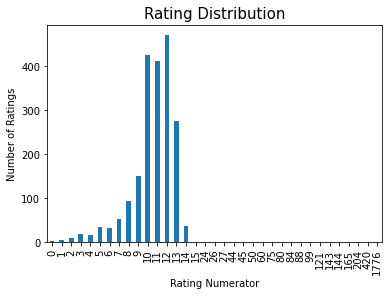

In [155]:
df['rating_numerator'].value_counts().sort_index().plot(kind='bar')
plt.title ('Rating Distribution', size=15)
plt.xlabel('Rating Numerator')
plt.ylabel('Number of Ratings')
plt.savefig('rating_numerator_distribution');

##### More than 400 dogs were given a rating of 12, and the most common rating is 10, 11, and 12

#### 2- Dog stage distribution 

In [156]:
df['dog_stage'].value_counts()

None       1741
pupper      221
doggo        65
puppo        24
floofer       8
Name: dog_stage, dtype: int64

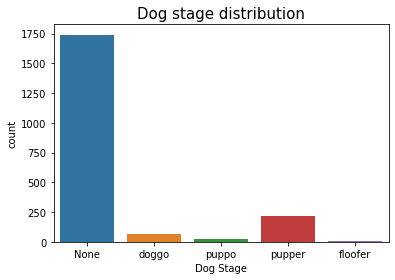

In [157]:
sns.countplot(data=df, x='dog_stage')
plt.title('Dog stage distribution', size=15)
plt.xlabel('Dog Stage')
plt.savefig('dog_stage_distribution');

##### The most common owned dog stage is pupper, the None stage might be dogs for sale 

### 3- Breed and prediction distribution 

In [161]:
df['breed_prediction'].value_counts()

Golden retriever        173
Labrador retriever      110
Pembroke                 95
Chihuahua                93
Pug                      65
                       ... 
Bouvier des flandres      1
Standard schnauzer        1
Scotch terrier            1
Clumber                   1
Japanese spaniel          1
Name: breed_prediction, Length: 113, dtype: int64

##### For easier display, only the first 5 will be taken in this distribution

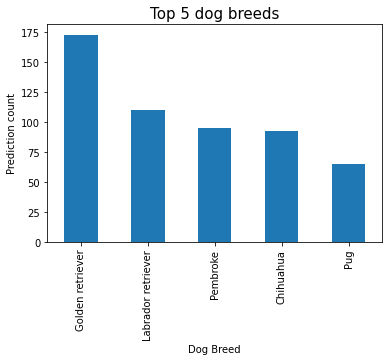

In [163]:
df['breed_prediction'].value_counts()[0:5].sort_values(ascending=False).plot(kind = 'bar')
plt.ylabel('Prediction count')
plt.title('Top 5 dog breeds', size=15)
plt.xlabel('Dog Breed')
plt.savefig('breed_distribution');

##### The highset dog breed prediction is Golden retriever

##### Now lets see how confedence these predections are

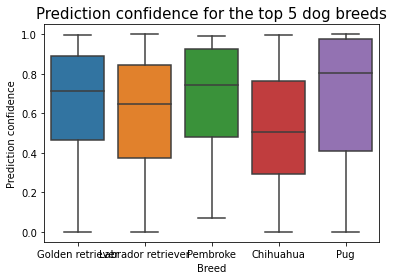

In [164]:
breed_list = df['breed_prediction'].value_counts()[0:5].index.tolist()

df_breed_list = df[df['breed_prediction'].isin(breed_list)]

sns.boxplot(x='breed_prediction', y='prediction_confidence', data=df_breed_list, order=breed_list)
plt.title('Prediction confidence for the top 5 dog breeds', size=15)
plt.xlabel('Breed')
plt.ylabel('Prediction confidence')
plt.savefig('prediction_confidence_distribution');

##### Notice that the highest confidence rate was for Pug and Pembroke, while the rest breeds were unsure like Chihuahua

### 4- Which dog stage has the highest retweets and favorite

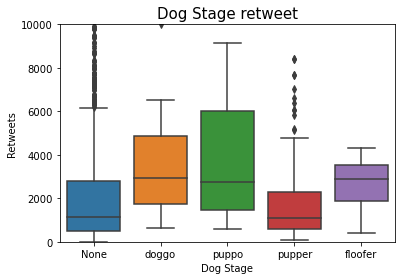

In [180]:
sns.boxplot(x='dog_stage', y='retweet_count', data=df)
plt.title('Dog Stage retweet', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Retweets')
plt.ylim(0,10000)
plt.savefig('dog_stage_retweet');

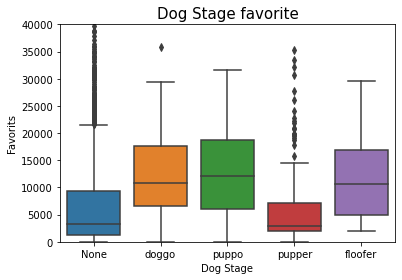

In [178]:
sns.boxplot(x='dog_stage', y='favorite_count', data=df)
plt.title('Dog Stage favorite', size=15)
plt.xlabel('Dog Stage')
plt.ylabel('Favorits')
plt.ylim(0,40000)
plt.savefig('dog_stage_retweet');

##### The Puppo stage has the most retweet and favorite counts 

### 5- Source distribution

In [158]:
df['source'].value_counts()

Twitter for iPhone    2019
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

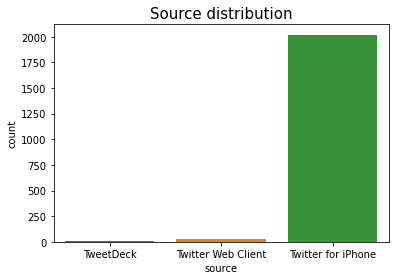

In [159]:
sns.countplot(data=df, x='source')
plt.title('Source distribution', size=15)
plt.savefig('source_distribution');

###### The most common source was the Twitter for iPhone

### Relation distribution between retweets and favorites

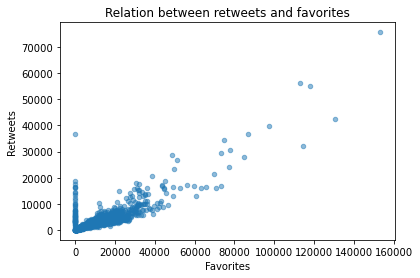

In [181]:
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Relation between retweets and favorites')
plt.savefig('relation_retweets_favorites');

##### There is a positive correlation between retweets and favourites